# Ch-4 Dynamic Programming- Jacks Car Rental Problem

Data given:
- 2 locations
- if rented-> gain= $10
- if out of cars-> buissiness lost
- If need to shift cars (overnight)-> cost= $2
- Number of cars requested and returned-> Poisson Random variables.
- for rental: $\lambda=3,4$ for 1st and second locations
- for returns: $\lambda=2,3$
- discount factor-> $\gamma=0.9$
- No more than 20 cars per location.

#### Solved using: POLICY ITERATION

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy as sc
import seaborn as sns

Defining the constants:

In [3]:
MAX_CARS=20
MAX_MOVE_CAR=5
RENTAL_REQ_FIRST_LOC=3
RENTAL_REQ_SEC_LOC=4
RETURN_REQ_FIRST_LOC=2
RETURN_REQ_SEC_LOC=3
DIS=0.9
RENTAL_CREDIT=10
MOVE_COST=2


In [43]:
#all possible actions: basivcally we can perform these type of actions
actions=np.arange(-MAX_MOVE_CAR, MAX_MOVE_CAR+1)

In [44]:
poisson={}
def poisson_probability(n,lam): #we're asking for the number of successes (n) and the expected number.
    key=10*n + lam   #basically the key should be: (20,21,22,...30,..) (n=number req or ret and lam=expected to req or ret)
    if key not in poisson:
        poisson[key]=sc.stats.poisson.pmf(n,lam)   #we need this number iff it still doesn't exist in the space of the probabilities requested
    return poisson[key]


Creating the expected_return $V_{\pi,a}$

- state= number of cars in first and second locations
- action= +ve if cars moved from 1-2 and -ve otherwise
- stateValue= matrix of all the states and the value.

In [45]:
poisson_upper_bound=11 #if the number of cars requested beyond this point then it becomes=0
def expected_return(state, action, state_val):
    returns=0.0
    returns-=(MOVE_COST)*abs(action)
    num_cars_first_loc=min(state[0]-action, MAX_CARS)
    num_cars_sec_loc=min(state[1]+action, MAX_CARS)

    #all possible rental requests:
    for rental_req_first_loc in range(poisson_upper_bound):
        for rental_request_sec_loc in range(poisson_upper_bound):
            prob=poisson_probability(rental_req_first_loc, RENTAL_REQ_FIRST_LOC)*poisson_probability(rental_request_sec_loc, RENTAL_REQ_SEC_LOC)
            num_first=num_cars_first_loc
            num_sec=num_cars_sec_loc

            #rental validity:
            valid_rent_req_first=min(num_first,rental_req_first_loc)
            valid_rent_req_sec=min(num_sec, rental_request_sec_loc)

            #credits:
            reward=(valid_rent_req_first+valid_rent_req_sec)*RENTAL_CREDIT
            num_first-=valid_rent_req_first
            num_sec-=valid_rent_req_sec

            for returned_cars_first_loc in range(poisson_upper_bound):
                for returned_cars_second_loc in range(poisson_upper_bound):
                    prob_return=poisson_probability(returned_cars_first_loc, RETURN_REQ_FIRST_LOC)*poisson_probability(returned_cars_second_loc, RETURN_REQ_SEC_LOC)
                    num_first_=min(num_first+returned_cars_first_loc, MAX_CARS)
                    num_sec_=min(num_sec+returned_cars_second_loc, MAX_CARS)
                    prob_=prob_return*prob
                    returns+=prob_*(reward+DIS*state_val[num_first_,num_sec_])
    return returns

In [46]:
value=np.zeros((MAX_CARS+1, MAX_CARS+1))
value

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [47]:
policy=np.zeros(value.shape, dtype=np.int)

/tmp/ipykernel_4055/2543983280.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  policy=np.zeros(value.shape, dtype=np.int)


In [48]:
policy

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

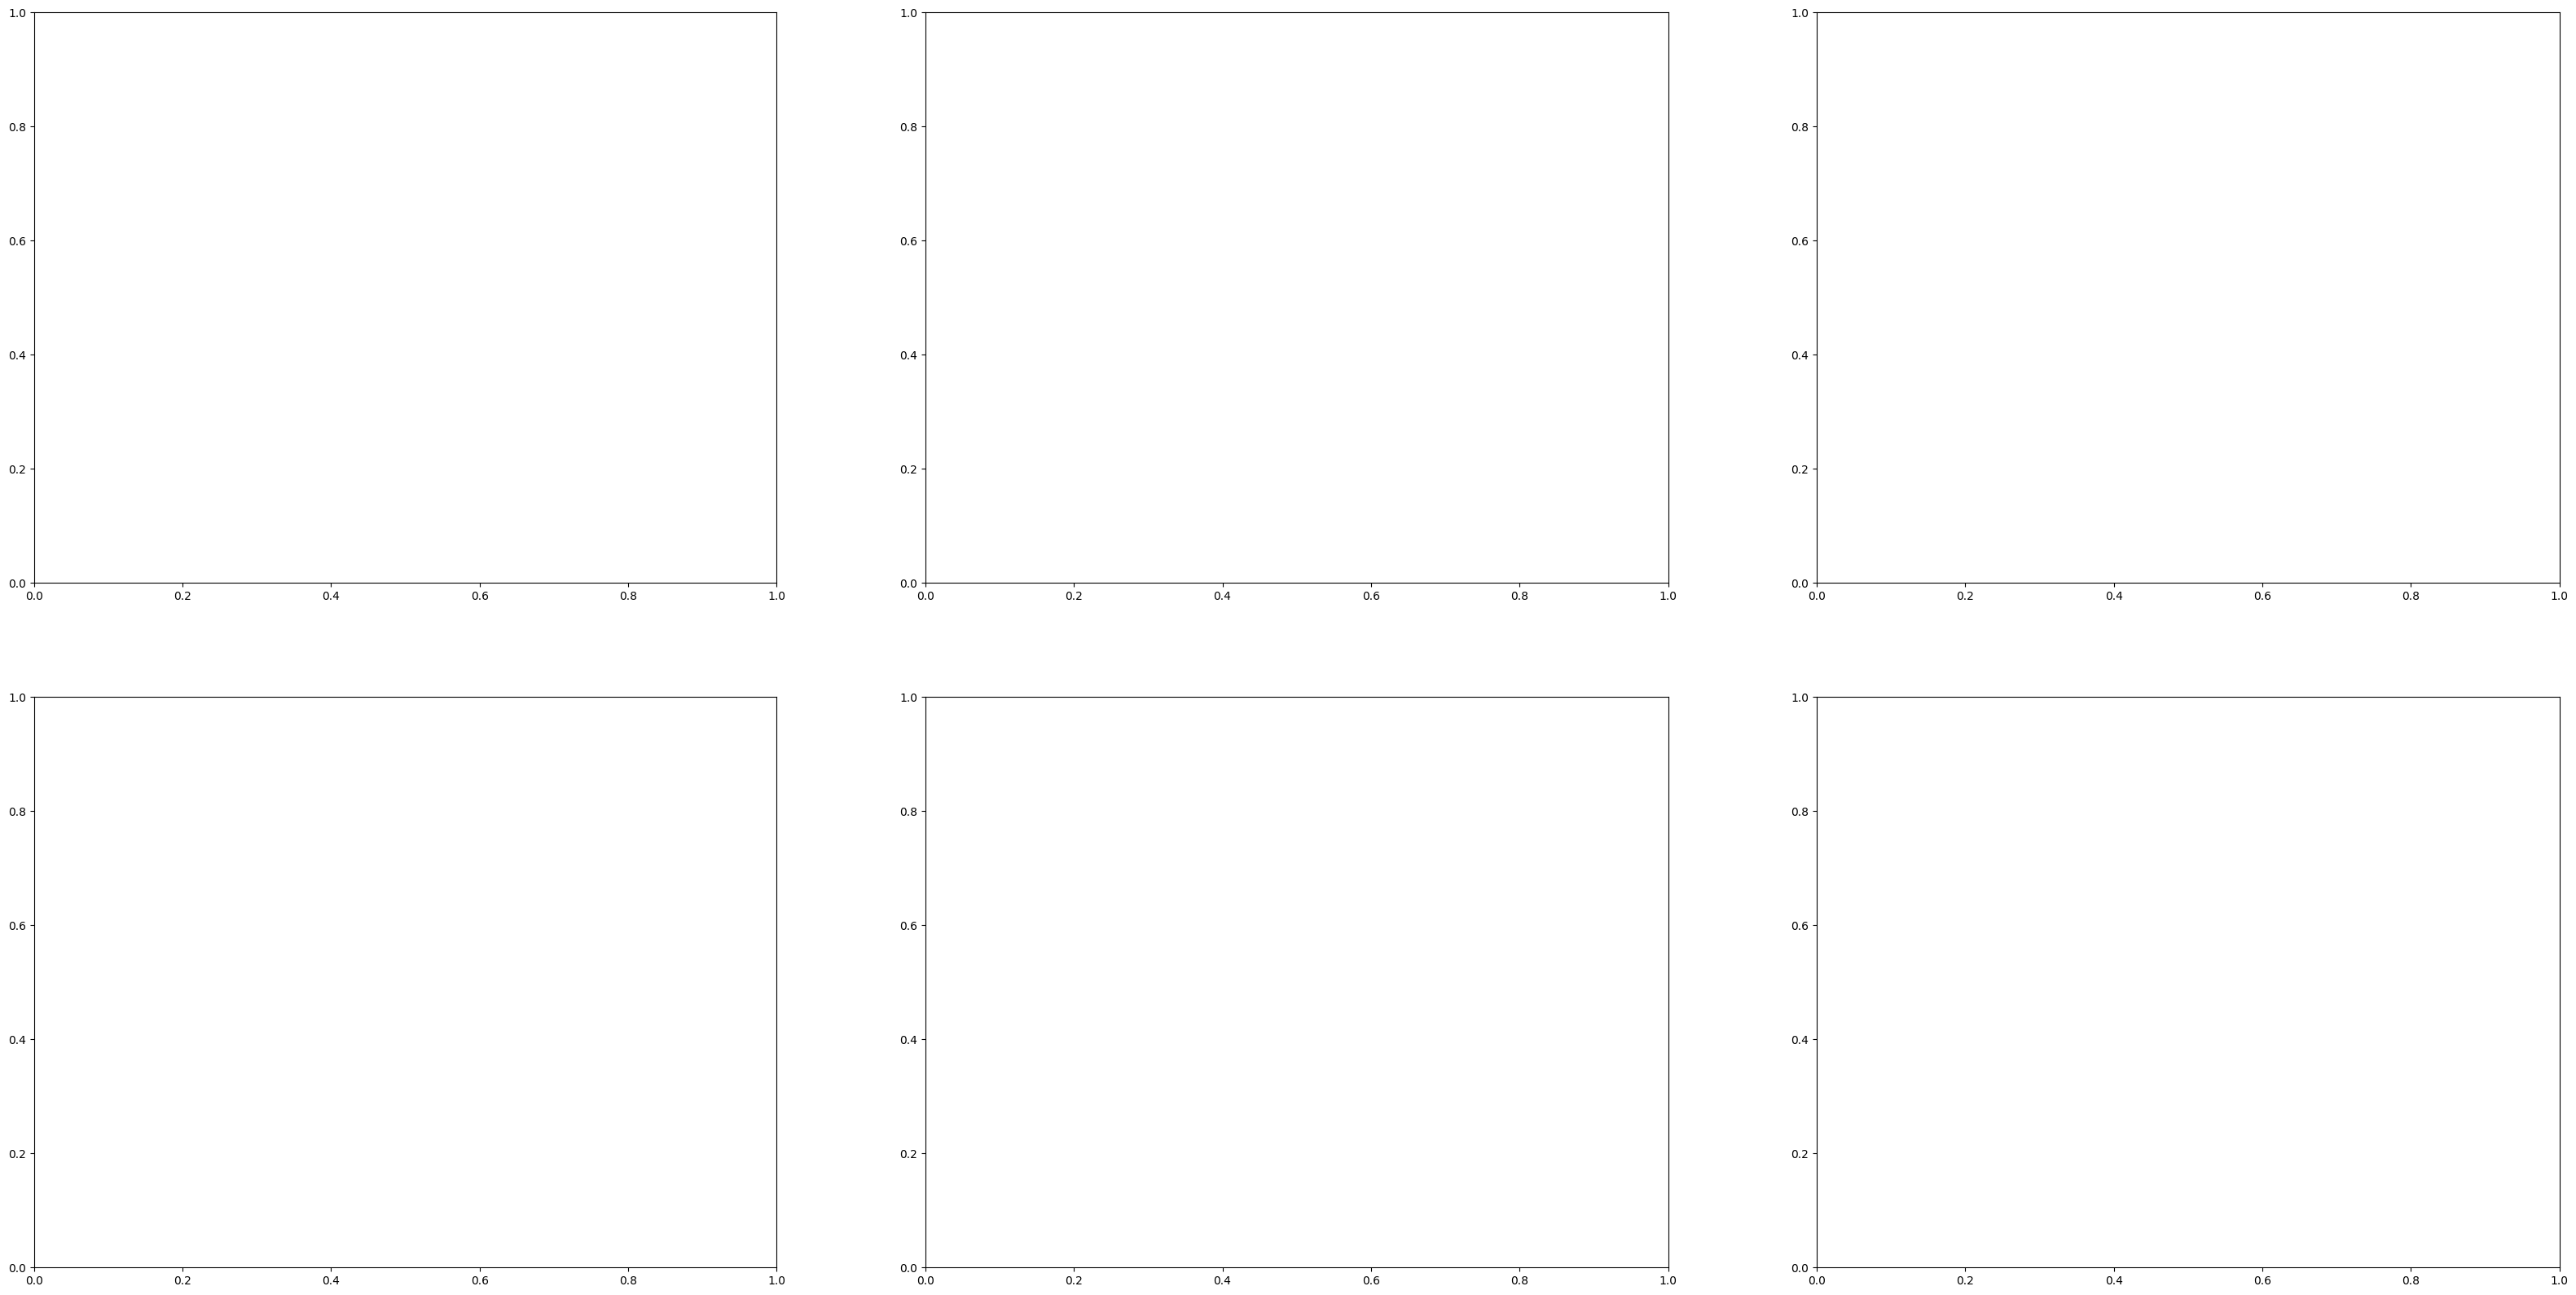

In [49]:
iterations=0
_, axes = plt.subplots(2, 3, figsize=(40, 20))

In [50]:
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes=axes.flatten()


<Figure size 640x480 with 0 Axes>

In [52]:
while True:
        fig = sns.heatmap(np.flipud(policy), cmap="YlGnBu", ax=axes[iterations])
        fig.set_ylabel('# cars at first location', fontsize=30)
        fig.set_yticks(list(reversed(range(MAX_CARS + 1))))
        fig.set_xlabel('# cars at second location', fontsize=30)
        fig.set_title('policy {}'.format(iterations), fontsize=30)
        
        #POLICY EVAL:
        while True:
            old_val=value.copy()
            for i in range(MAX_CARS+1):
                for j in range(MAX_CARS+1):
                    new_state_val=expected_return([i,j], policy[i,j], value)
                    value[i,j]=new_state_val
            max_val_change=abs(old_val-value).max()
            print('max_value change :{}'.format(max_val_change))
            if max_val_change<1e-4:
                break
        
        #POLICY IMPROVEMENT:
        policy_stable = True
        for i in range(MAX_CARS + 1):
            for j in range(MAX_CARS + 1):
                old_action = policy[i, j]
                action_returns = []
                for action in actions:
                    if (0 <= action <= i) or (-j <= action <= 0):
                        action_returns.append(expected_return([i, j], action, value))
                    else:
                        action_returns.append(-np.inf)
                new_action = actions[np.argmax(action_returns)]
                policy[i, j] = new_action
                if policy_stable and old_action != new_action:
                    policy_stable = False
        print('policy stable {}'.format(policy_stable))

        if policy_stable:
            fig = sns.heatmap(np.flipud(value), cmap="YlGnBu", ax=axes[-1])
            fig.set_ylabel('# cars at first location', fontsize=30)
            fig.set_yticks(list(reversed(range(MAX_CARS + 1))))
            fig.set_xlabel('# cars at second location', fontsize=30)
            fig.set_title('optimal value', fontsize=30)
            break

        iterations += 1
plt.show()

max_value change :203.89430406506466
max_value change :131.87854228147327
max_value change :88.02956636027409
max_value change :64.54561450894161
max_value change :52.3920364109531
max_value change :41.77112382829176
max_value change :33.12329461464486
max_value change :26.271303882579787
max_value change :21.04616269619271
max_value change :17.212213687203302
max_value change :14.05143968669205
max_value change :11.456909033298132
max_value change :9.333284480056136
max_value change :7.598512343350421
max_value change :6.183349273148167
max_value change :5.030055126275272
max_value change :4.090849003233075
max_value change :3.326393528709616
max_value change :2.7044172818195307
max_value change :2.198511852889851
max_value change :1.787105613305073
max_value change :1.452600992111286
max_value change :1.1806562177737874
max_value change :0.9595913048068496
max_value change :0.7798990907037364
max_value change :0.6338440948463244
max_value change :0.5151342278364837
max_value change :

KeyboardInterrupt: 